# Python Notebook: Problem Sheet 1 - Q7


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Code to generate the data
filename = 'https://ifcs.boku.ac.at/repository/data/spike_sorting/spike_sorting.csv'
X = pd.read_csv(filename)
X = X[X['truecluster']==0]
X = X.drop(columns='truecluster')
X = X[1000:2000]
X.head()
X.to_csv('spike_data.csv')

X = pd.read_csv('spike_data.csv')
print('(n, p) =', X.shape)
X

(n, p) = (1000, 97)


,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96
0,1011,26298,-22636,1395,21696,-17046,-2189,-22042,-5896,-10374,...,-3113,13009,23897,4123,10028,8452,-8317,-21139,-11052,6101
1,1012,-426,3239,-775,-41919,-3499,6263,-13625,27959,37717,...,277,-19962,42648,-7387,-1700,54,-5302,-27126,8308,-9030
2,1013,-10614,4330,-799,21073,-1668,216,6469,13701,36960,...,-13007,-13042,-32601,7593,-33461,28981,4357,-30211,-28,5591
3,1014,-36181,23396,-7843,-16563,39677,-22798,-35400,-21924,-30441,...,-6264,35510,6119,-27422,-34863,36760,949,6761,9881,-7794
4,1015,10608,4436,5392,-8688,31224,23058,-12388,10097,-2552,...,-59947,-41067,1770,-30100,4673,9804,-14088,17443,-14152,-9170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2017,3770,17788,15639,27685,14518,-7373,10083,18662,2257,...,16113,-24211,-18878,-17572,13083,-47371,-19762,15499,-32720,42
996,2018,10253,12889,-36385,28090,-8570,-25825,21819,-28559,14001,...,1341,-7439,25417,6504,26920,-12891,-3326,-3363,-2170,-26496
997,2019,31872,-19145,19059,66102,-64358,26610,52181,-27780,9814,...,-43987,-11050,-4296,-1841,-11013,8797,17877,13086,-33594,-15249
998,2020,-38113,1752,18994,-24638,-16602,12576,-34118,-8283,15822,...,-25098,-23502,-7781,4689,-66961,18106,27560,-10276,3127,18254


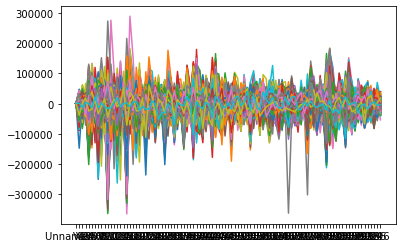

<Figure size 432x288 with 0 Axes>

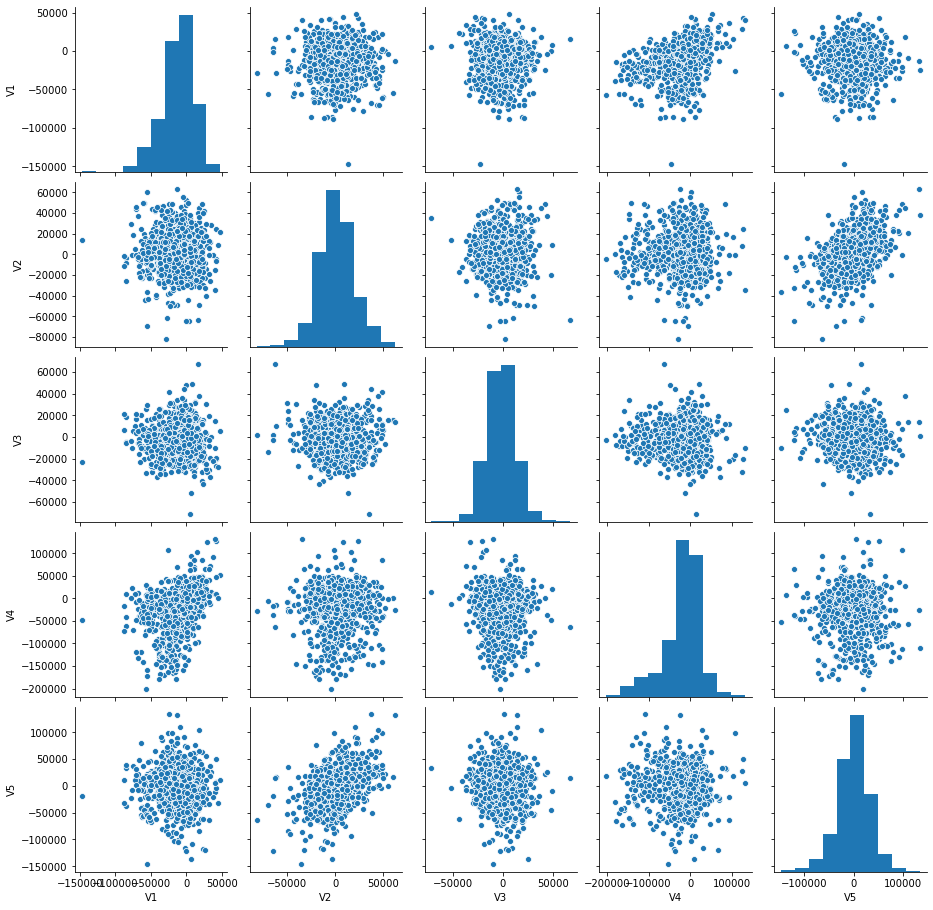

In [4]:
# Some exploratory data analysis
plt.figure()
plt.plot(X.T);

plt.figure()
sns.pairplot(data=X[['V1','V2', 'V3', 'V4', 'V5']]);

In [10]:
pca = PCA(n_components = 2, whiten=True)
pca.fit(X)

Z = pca.transform(X)
Z = pd.DataFrame(Z, columns=['PC1', 'PC2'])

<Figure size 432x288 with 0 Axes>

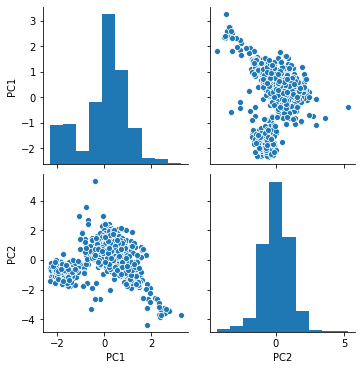

In [14]:
# Pairplot of the projection on the principal components
plt.figure()
sns.pairplot(data=Z);

In [15]:
# Apply Kmeans on the first two components
kmeans = KMeans(n_clusters = 2, n_init=100, init ='random')
kmeans.fit(Z) # apply Kmeans using the first two components of Z
labels = kmeans.labels_
Z2 = pd.concat([pd.DataFrame(Z,columns=['PC1','PC2']),pd.DataFrame(labels, columns=['Cluster label'])], axis=1)
Z2

,PC1,PC2,Cluster label
0,0.025046,0.328029,1
1,0.396766,0.212792,1
2,0.258915,0.080771,1
3,0.042320,0.442110,1
4,-1.771210,-0.540494,0
...,...,...,...
995,-0.102642,0.596773,1
996,-0.360441,1.511007,1
997,-2.124769,-0.137733,0
998,0.947709,-0.385752,1


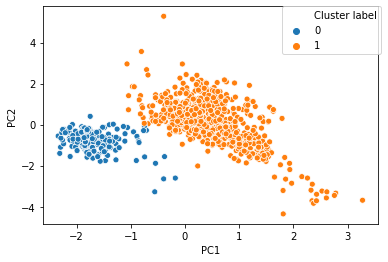

In [19]:
plt.figure()
sns.scatterplot(data = Z2, x='PC1', y='PC2', hue = 'Cluster label')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()

In [20]:
# Create a panda table with the data and cluster labels
X2 = pd.concat([X,pd.DataFrame(labels, columns=['Cluster label'])], axis=1)

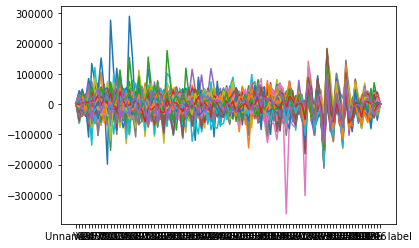

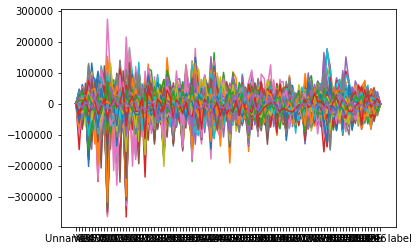

In [21]:
# Plot observations in cluster 0
plt.figure()
plt.plot((X2[X2['Cluster label']==0]).T)

# Plot observations in cluster 1
plt.figure()
plt.plot((X2[X2['Cluster label']==1]).T);

In [22]:
# We decode the cluster means, to represent them in the original data space
x_hat = pca.inverse_transform(kmeans.cluster_centers_)
x_hat.shape

(2, 97)

In [23]:
kmeans.cluster_centers_

array([[-1.67340148, -0.7945876 ],
       [ 0.40535812,  0.19247774]])

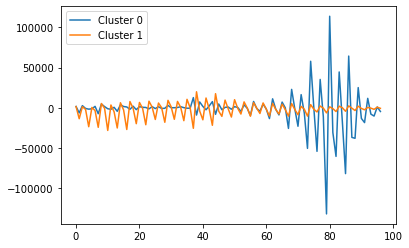

In [24]:
plt.figure()
plt.plot(x_hat.T);
plt.legend(['Cluster 0', 'Cluster 1']);